# Programming Exercise 1 - Linear Regression

- [warmUpExercise](#Question-1-:-warmUpExercise)
- [Linear regression with one variable](#Linear-regression-with-one-variable)
  - [Cost Computation](#Question-2-:-Cost-Computation)
  - [Gradient Descent](#Question-3-:-Gradient-Descent)

Here we start by importing libraries and initilize program.

You do not need to modify this cell

In [1]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

### Question 1 : warmUpExercise
You have to write a function that retuns the following identity matrix (5, 5)
<sub><sup>
$$ \begin{bmatrix}
1 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
$$
</sup></sub>

In [3]:
def warmUpExercise():
    idmatrix = np.array([[]])
    # your code here    
    return(idmatrix)

In [4]:
warmUpExercise()

array([], shape=(1, 0), dtype=float64)

## Linear regression with one variable
We first read the data file (containing 1 line per point where x and y are seprated with ,)<br/>
Then we plot the data<br/>

In [5]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',')

X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]

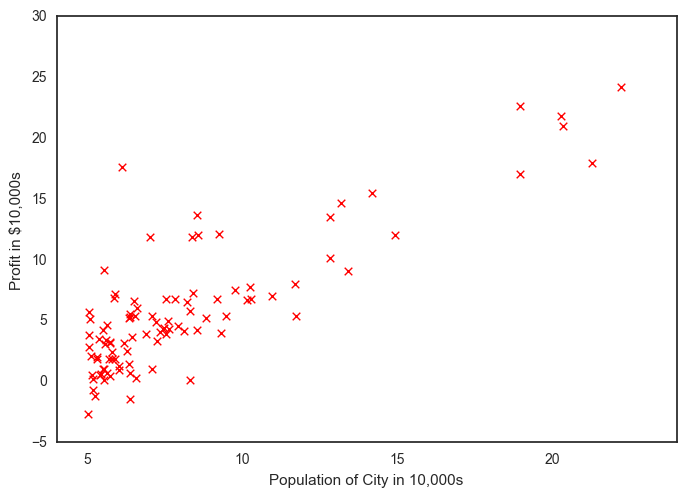

In [6]:
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

### Question 2 : Cost Computation
Here we have to compute the cost given by :<br/>

$$ J(\theta) =  \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)} )^{2} $$

You should now write the *computeCost* function that computes $J$.
Initial value of cost should be around 32.07

In [7]:
def computeCost(X, y, theta=[[0],[0]]):
    m = y.size
    J = 0
    # your code here
    return(J)

In [8]:
computeCost(X,y)

0

### Question 3 : Gradient Descent
We have to repeat the following num_iters times :<br/>
- compute gradient
- update $\theta$
- compute cost and save it to J_history 

$\theta$ should be update as follow : <br/>

\begin{align}  \theta_0 := & \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}(h_\theta(x_{i}) - y_{i}) \newline \theta_1 := & \theta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}\left((h_\theta(x_{i}) - y_{i}) x_{i}\right) & \end{align}


In [9]:
def gradientDescent(X, y, theta=np.array([[0],[0]]), alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters);
    
    for iter in np.arange(num_iters):
        h = 0;
        #your code here
    return(theta, J_history)

('theta: ', array([0, 0]))


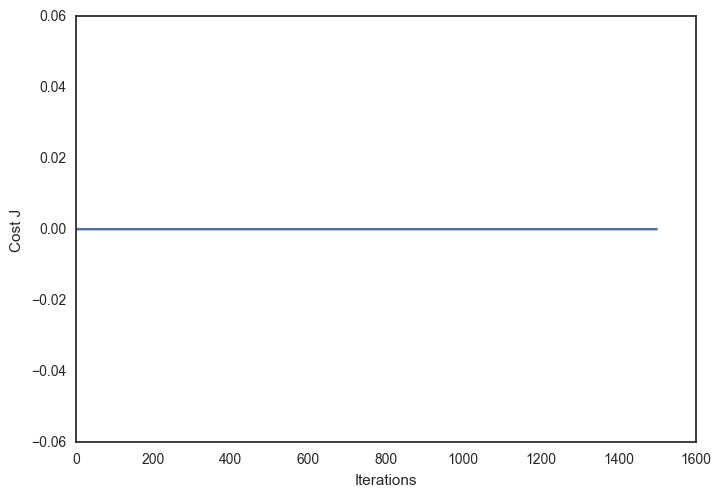

In [10]:
# theta for minimized cost J
theta , Cost_J = gradientDescent(X, y);
print('theta: ',theta.ravel())

plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

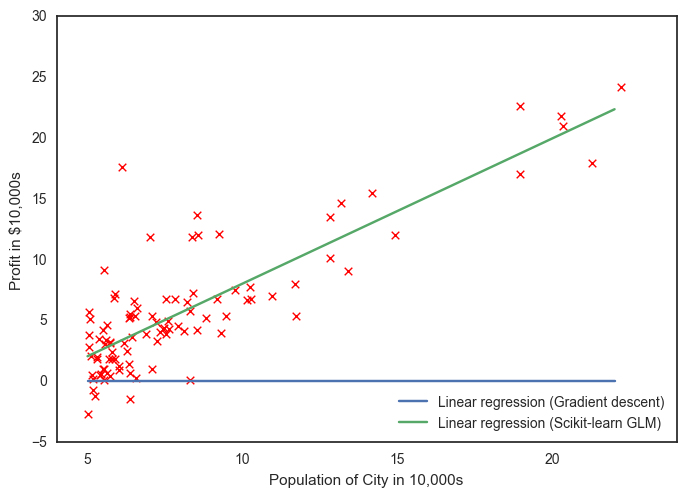

In [11]:
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx

# Plot gradient descent
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

# Compare with Scikit-learn Linear regression 
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

In [12]:
# Predict profit for a city with population of 35000 and 70000
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[ 0.]
[0]


/usr/lib/python2.7/dist-packages/mpl_toolkits/mplot3d/axes3d.py:722: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


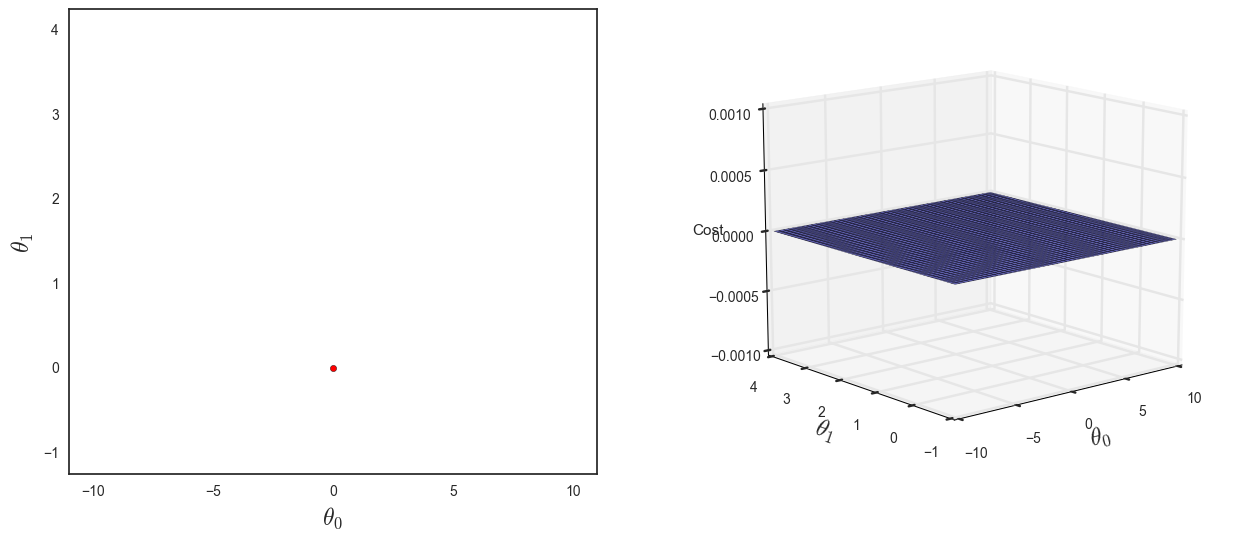

In [13]:
# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(X,y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)